# Homework 1
### Introduction to Data Science EN.553.436/EN.553.636 - Fall 2021

Due date: Wednesday, September 22 at midnight.

## Guidelines
* Answer in the cells immediately below the problem statements. If a problem calls for code, a code cell will follow. If a problem calls for a text response, a Markdown cell will follow.
* Your code should include some comments. Insufficient commentary may result in loss of points. But you do not necessarily need to comment every line or problem. Further guidelines:
    - If the the meaning of some line of code would be obvious to the average Python novice, you do not need to comment (e.g., you do not need to comment _import numpy_). 
    - If your code is moderately complex, you should comment (e.g., if you nest several functions in one line, you should comment). 
    - It may be proper to comment before a code block to describe generally what you are doing (e.g., you should comment before a function definition to explain the function and its parameters).

# Problem 1

## 1.1
Load the _lowbwt_ dataset from the OpenML repository as a Pandas DataFrame from following URL: https://www.openml.org/data/get_csv/3640/dataset_2189_lowbwt.arff. Use a function that is able to handle loading the data directly into Jupyter from the URL. The function should take the URL as an argument. **Do not load the data using a filepath on your hard drive:** again, load the data directly into Jupyter using the URL.

Print the loaded DataFrame. Read the [description](https://www.openml.org/d/203) of the dataset to better understand it. Check the column names and values to see if they match the variables discussed in the description. One or more variables may have been renamed.

In [1]:
import pandas as pd

df = pd.read_csv("https://www.openml.org/data/get_csv/3640/dataset_2189_lowbwt.arff")
print(df)

     LOW  AGE  LWT  RACE  SMOKE  PTL  HT  UI  FTV  class
0      0   19  182     2      0    0   0   1    0   2523
1      0   33  155     3      0    0   0   0    3   2551
2      0   20  105     1      1    0   0   0    1   2557
3      0   21  108     1      1    0   0   1    2   2594
4      0   18  107     1      1    0   0   1    0   2600
..   ...  ...  ...   ...    ...  ...  ..  ..  ...    ...
184    1   28   95     1      1    0   0   0    2   2466
185    1   14  100     3      0    0   0   0    2   2495
186    1   23   94     3      1    0   0   0    0   2495
187    1   17  142     2      0    0   1   0    0   2495
188    1   21  130     1      1    0   1   0    3   2495

[189 rows x 10 columns]


## 1.2
From the full DataFrame, extract and print a DataFrame with the birthweight column (and only the birthweight column) for mothers who smoked during pregnancy and had low-birthweight deliveries.

In [5]:
selected_weights = df.loc[(df['SMOKE'] == 1) & (df['LOW'] == 1), ['LWT']]
print(selected_weights)

     LWT
130  120
132  187
139  165
140  105
141   91
144   92
145  150
147  155
152  112
153  117
155  130
156  120
157  130
159   80
160  110
164  110
165  121
168  102
170  187
171  122
172  105
175  142
176  130
177  120
178  110
182  190
183  101
184   95
186   94
188  130


## 1.3
Print the following statistics for the birthweights in the original full dataset:
- Standard deviation
- 0.16 Quantile
- Mean
- Median
- 0.84 Quantile

Afterwards, print the same statistics for the birthweights in the subset you selected in 1.2.

In [6]:
import scipy
from scipy.stats import skew, kurtosis
import numpy as np

label = ['Standard Deviation', '0.16 Quantile' , 'Mean','Median', '0.84 Quantile']

# # stats for birthweights in original full dataset
birth_weights = df['LWT'].values
value = [np.std(birth_weights), np.quantile(birth_weights, 0.16), np.mean(birth_weights), np.median(birth_weights), np.quantile(birth_weights, 0.84)]

print('***Statistics for the birthweights in the original full dataset***')
for i in range(len(label)):
    print(f"{label[i]}: {value[i]}")

print("\n")
    
# stats for birthweights in subset selected in 1.2
selected_data = selected_weights['LWT'].values

# print(selected_weights)
selected_value = [np.std(selected_data), np.quantile(selected_data, 0.16), np.mean(selected_data), np.median(selected_data), np.quantile(selected_data, 0.84)]
print('***Statistics for the birthweights in the subset selected in 1.2 ***')
for i in range(len(label)):
    print(f"{label[i]}: {selected_value[i]}")


***Statistics for the birthweights in the original full dataset***
Standard Deviation: 30.498375229385143
0.16 Quantile: 105.0
Mean: 129.8148148148148
Median: 121.0
0.84 Quantile: 155.0


***Statistics for the birthweights in the subset selected in 1.2 ***
Standard Deviation: 28.5462782162579
0.16 Quantile: 98.84
Mean: 124.1
Median: 120.0
0.84 Quantile: 151.8


## 1.4
Plot two density histograms: one for the birthweights in the full dataset, and one for the birthweights in the subset you selected in 1.2. Label the histograms.

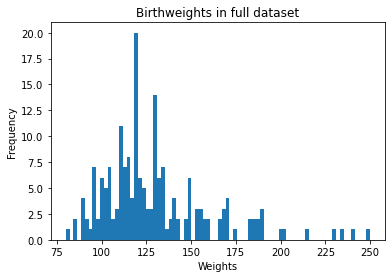

In [7]:
import matplotlib.pyplot as plt

plt.hist(birth_weights, bins=80)
plt.title("Birthweights in full dataset")
plt.xlabel("Weights")
plt.ylabel("Frequency");

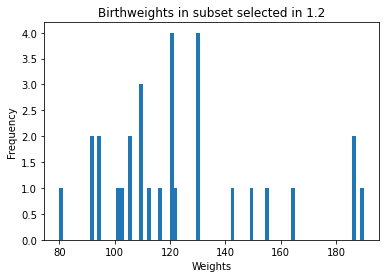

In [8]:
plt.hist(selected_data, bins=80)
plt.title("Birthweights in subset selected in 1.2")
plt.xlabel("Weights")
plt.ylabel("Frequency");

## 1.5
Is a normal distribution a plausible model for birthweight in either of the two datasets? Back up your answer using the previous results. This image of a normal PDF may be useful:


![Normal PDF](bell-curve.jpeg)

### _Answer:_

Normal distribution is not a plausible model for any of the dataset. According to the histogram plotted in 1.4, the frequency of birtweight after the mean is significantly less than the frequency before the mean. This does not conform with the bell-shape curve. Thus, result from normal distribution may not represent these datapoints well.

On the other hand, by looking at the descriptive statistics in 1.3, normal distribution suits better to the subset selected at 1.2 than full dataset, as the value of 16\% quantile and 84\% quantile is more approximate to (mean - standard deviation) and (mean + standard deviation), and the difference between mean and median are less for the former.

# Problem 2
In this exercise, we will proceed in steps to perform rejection sampling of a [beta random variable](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html) using a [triangular random variable](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html) as candidate.

## 2.1
Plot an overlay of a beta PDF and a triangular PDF with the following parameters:
- For the beta PDF, a=2, b=2, loc=0, scale=1.
- For the triangular PDF, c=0.50, loc=0, scale=1.

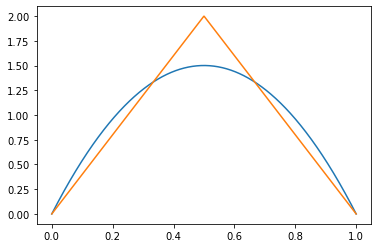

In [46]:
from scipy.stats import beta, triang, uniform
import matplotlib.pyplot as plt

p1 = lambda x : beta.pdf(x, a=2, b=2, loc=0, scale=1)  # target distribution
p2 = lambda x : triang.pdf(x, c=0.5, loc=0, scale=1)  # candidate distribution
x = np.linspace(0,1,1000)  
plt.plot(x, p1(x))
plt.plot(x, p2(x))

## 2.2
We will perform 10,000 trials of the rejection sampling procedure. Simulate and store 10,000 random variables distributed as $\text{Uniform}[0,1]$ using random state 436. Simulate and store 10,000 triangular random variables from the specified triangular distribution using random state 636.

In [35]:
N = 10000

norm_rv = uniform.rvs(size=N, random_state=436)
print(norm_rv)

triang_rv = triang.rvs(c=0.5, loc=0, scale=1, size=N, random_state=636)
print(triang_rv)

[0.2370753  0.74754928 0.32864924 ... 0.13534041 0.84101047 0.37894859]
[0.47207495 0.18440343 0.75170731 ... 0.60398335 0.10418176 0.40292859]


## 2.3
Let $f$ be the beta PDF and $g$ the triangular PDF. Using 1.50 as an estimate of $\sup f/g$, generate samples from the beta distribution by rejection sampling. Store your samples. Print the number of samples you obtain.

In [62]:
# rejection sampling; candidate density: triangular distribution; target: beta distribution
# rejection sampling algorithm: https://bookdown.org/rdpeng/advstatcomp/rejection-sampling.html 6.3.1
samples = []
c = 1.5
beta_rv = beta.rvs(a=2, b=2, loc=0, size=N, scale=1, random_state=666)
for i in range(N):
    u = beta_rv[i]
    ratio = p2(triang_rv[i]) / p1(triang_rv[i])
    # accept if a beta random variable is <= ratio / c
    if u <= ratio/c:
        samples.append(u)
        
# number of samples obtained
print(len(samples)) 

7508


## 2.4
Plot a density histogram of your samples overlaid with the beta and triangular PDFs. Use 100 bins.

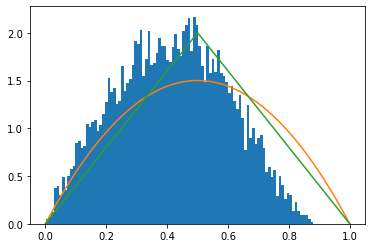

In [63]:
plt.hist(samples, density=True, bins=100);
plt.plot(x, p1(x))
plt.plot(x, p2(x));

# Problem 3

## 3.1
The Epanechnikov kernel is defined by
$$K(u) = \frac{3}{4}\left(1 - u^{2}\right)\qquad\text{for }\lvert u \rvert \leq 1$$
Perform Epanechnikov kernel density estimation on 1,000 simulated samples from a [lognormal distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html) with s=1 and random state 636. Use a bandwidth of 2.0. Plot the density estimate over the support of the lognormal distribution. (You can use 2 times the maximum of your samples as an upper bound for the support.)

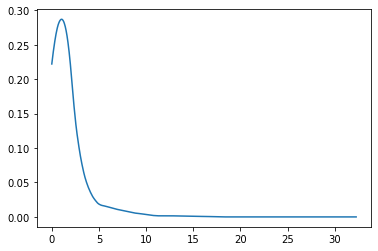

In [96]:
from sklearn.neighbors import KernelDensity
from scipy.stats import lognorm

# generate 100 random variables using lognormal distribution
samples = lognorm.rvs(s=1, size=1000, random_state=636)

# get the 2 times maximum of samples to avoid strong-edge effect
upper_bound = 2 * samples.max()
x = np.linspace(0, upper_bound, 1000) 

kde = KernelDensity(kernel='epanechnikov', bandwidth=2.0).fit(samples[:, np.newaxis]) # reshape to 2D array as required
lognorm_dens = kde.score_samples(x[:, np.newaxis])

f = np.exp(lognorm_dens)
plt.plot(x, f)

## 3.2
Test whether the estimate integrates to unity over the support of the lognormal distribution.

In [97]:
# use trapezoidal function to integrate to unity over the support of lognormal distribution
np.trapz(f, x)

0.8218100002145949

## 3.3
Explain the results of your integration.

### _Answer:_

As Kernel Density Estimation (KDE) is only a method to eastimate the true probability density function of samples, it is normal that there are some misses, such as edge points not covered, kernel selection not right, etc. The possible cause for our case is that, the size of the kernel could be further adjusted, to better fit all the points in the sample.

# Problem 4

## 4.1
Below we load the [Boston house prices dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset). We also store the labels of the predictor variables for you.

Our goal will be to predict house price (MEDV) by regression. Split the dataset into a training and test set using 1/3 as the test size and a random state of 553. Use the function [_train_test_split_](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from _sklearn.model_selection_ for this purpose.

In [5]:
# Loading data:

# Import function for loading the 'boston' dataset.
from sklearn.datasets import load_boston
# Load a 'bunch' containing data and descriptions.
boston_bunch = load_boston()
# Extract and store predictor variables.
X = boston_bunch.data
# Extract and store the variable that is the target for prediction.
y = boston_bunch.target
# Extract and store labels of predictor variables.
labels = boston_bunch.feature_names

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
# Your code:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=float(1/3), random_state=553)

## 4.2
Fit three different linear models on the training set by ordinary least squares (OLS): 
- A model using all predictor variables.
- A model using only AGE, NOX, DIS, and RAD as predictor variables.
- A model using all polynomial combinations of degree $\leq 2$ of the original thirteen predictor variables.

## 4.3
For model assessment, print the following for each of the three models:
- The $R^{2}$ of the predictions on the training set.
- The $R^{2}$ of the predictions on the test set.
- Predicted MEDV for the first five sample points in the test set.
- True MEDV for the first five sample points in the test set.

## 4.4
Comment on your results in 4.3, which model do you think is the best? Explain you answer.

### _Answer:_

## 4.5
Consider the linear regression model using all original features you built above. Holding all other variables equal, what effect does the model predict that an increase in 0.1 parts per 10 million nitric oxide concentration in a place will have on the median value of of owner-occupied homes in that place? Write code that will return and print the answer.